In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame using mouse ID
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how = "left")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [66]:
# Checking the number of mice. Checked for number of mice plus extra data. # of mice = Mouse ID
print(merged_df.nunique())
merged_df["Mouse ID"].nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64


249

In [67]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head(10)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
dtype: int64

In [68]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df.loc[merged_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [69]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. Checking for unseen issues. 
mask = merged_df["Mouse ID"] != "g989"
clean_df = merged_df.loc[mask].reset_index(drop=True)
print(clean_df.nunique())
clean_df.shape

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64


(1880, 8)

In [70]:
# Checking the number of mice in the clean DataFrame. Also found above 
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:  
# Assemble the resulting series into a single summary DataFrame.
# Sort data
tumor_mean = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_variance = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_sd = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
# Make DF
tumor_data = {
    "Tumor Average": tumor_mean,
    "Tumor Median": tumor_median,
    "Tumor Variance": tumor_variance,
    "Tumor Std. Dev.": tumor_sd,
    "Tumor Std. Err.": tumor_sem
}
# Make Leaderboard 
ldr_board = pd.DataFrame(tumor_data).reset_index()
ldr_board

,Drug Regimen,Tumor Average,Tumor Median,Tumor Variance,Tumor Std. Dev.,Tumor Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [72]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
cols_agg = {
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
}
ldr_board2 = clean_df.groupby(["Drug Regimen"]).agg(cols_agg).reset_index()
ldr_board2

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

C:\Users\sferr\AppData\Local\Temp\ipykernel_41804\2061956419.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  clean_df["Drug Regimen"].value_counts().sort_values().plot(kind="barh", title="Drug Regimen Count", color="#4B0082").get_figure().show()


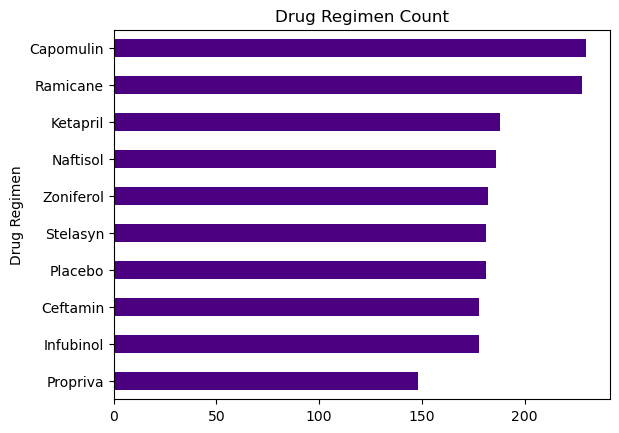

In [73]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Rotating the chart makes it easier to read compared to the example
clean_df["Drug Regimen"].value_counts().sort_values().plot(kind="barh", title="Drug Regimen Count", color="#4B0082").get_figure().show()

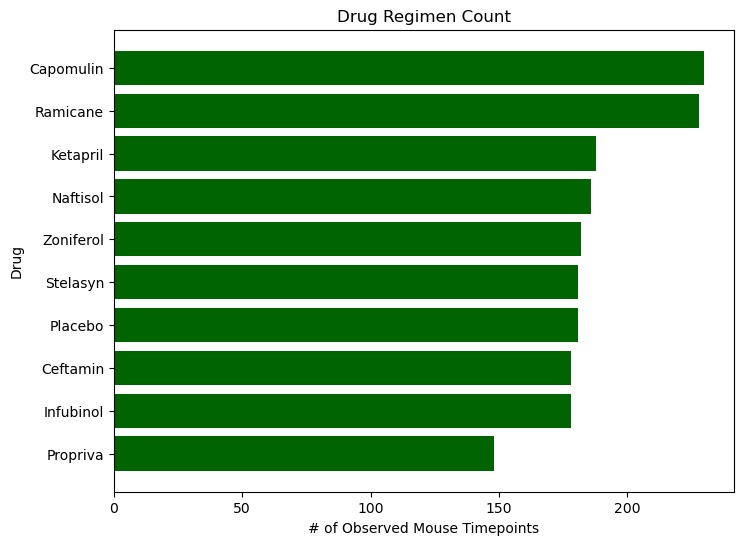

In [74]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_df["Drug Regimen"].value_counts().sort_values()
# Create a chart
plt.figure(figsize=(8, 6))
plt.barh(drug_regimen_counts.index, drug_regimen_counts.values, color='#006400')
plt.xlabel('# of Observed Mouse Timepoints')
plt.ylabel('Drug')
plt.title('Drug Regimen Count')
plt.show()

C:\Users\sferr\AppData\Local\Temp\ipykernel_41804\2334685812.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  mice_sex_counts.plot(kind='pie', figsize=(8, 8), colors=['#ff0000', '#2ca02c'], autopct='%1.1f%%', title='Sex Distribution').get_figure().show()


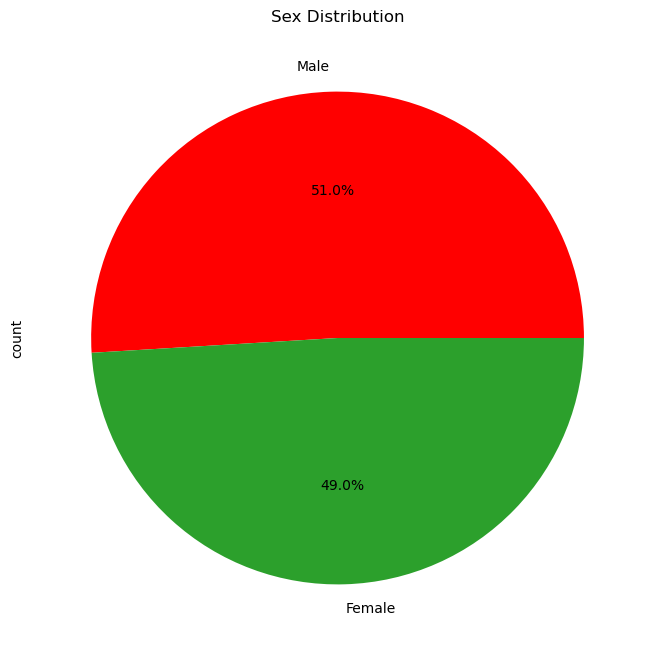

In [75]:
# Pie chart using pandas
mice_sex_counts = clean_df["Sex"].value_counts()
mice_sex_counts.plot(kind='pie', figsize=(8, 8), colors=['#ff0000', '#2ca02c'], autopct='%1.1f%%', title='Sex Distribution').get_figure().show()

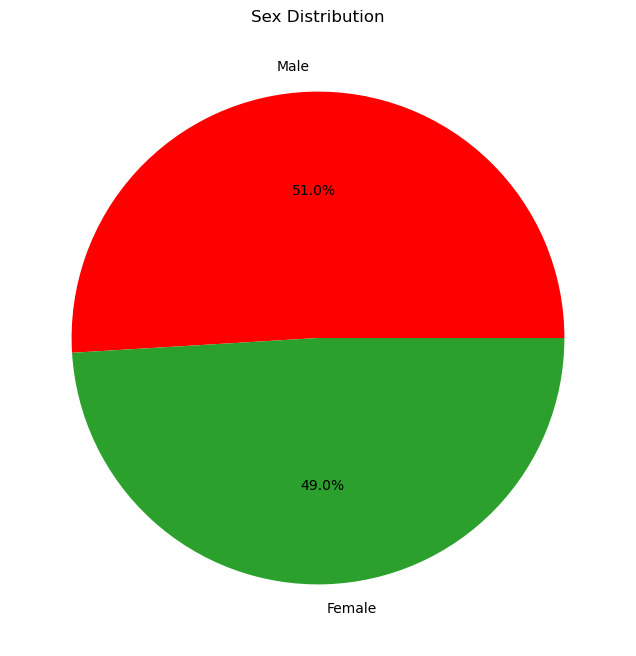

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex_counts = clean_df["Sex"].value_counts()

# Create chart
plt.figure(figsize=(8, 8))
plt.pie(mice_sex_counts, labels=mice_sex_counts.index, colors=['#ff0000', '#2ca02c'], autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = merged_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data2 = max_tumor.merge(merged_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_data2.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [78]:
# had a different colution, had Xpert assist with making the output more readable
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    if outliers.empty:
        print(f'No potential outliers for {drug}')
    else:
        print(f'Potential outliers for {drug}:')
        for index, value in outliers.items():
            print(f'Index: {index}, Value: {value}')

Potential outliers for Capomulin:
Index: 18, Value: 25.47214326
Index: 19, Value: 23.34359787
Potential outliers for Ramicane:
Index: 9, Value: 22.05012627
No potential outliers for Infubinol
No potential outliers for Ceftamin


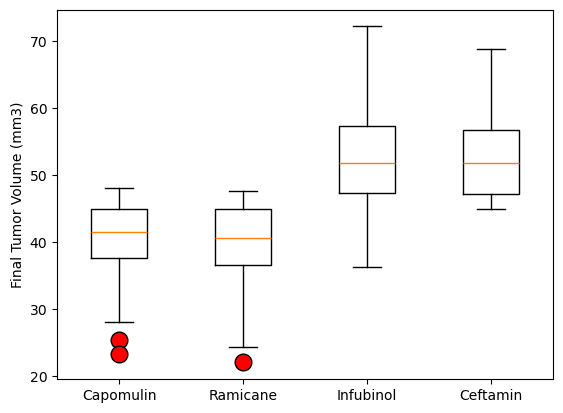

In [79]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol = [merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"].values for drug in treatment_list] # Needed to correct an error
red_out = dict(markerfacecolor='red', markersize=12)
plt.boxplot(tumor_vol, labels=treatment_list, flierprops=red_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

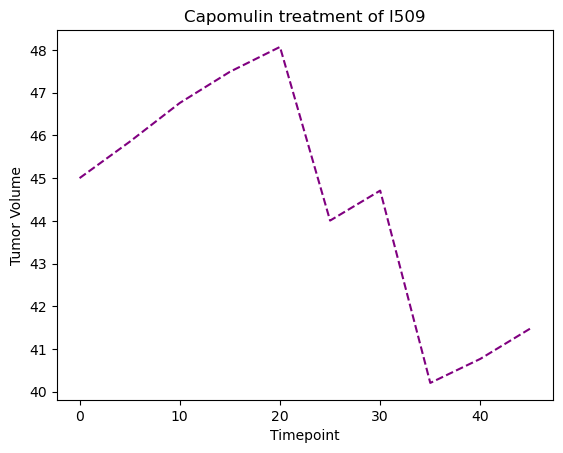

In [80]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table["Mouse ID"] == 'l509']

plt.plot(mousedata['Timepoint'], mousedata['Tumor Volume (mm3)'], color='purple', linestyle='--')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Capomulin treatment of l509')
plt.show()

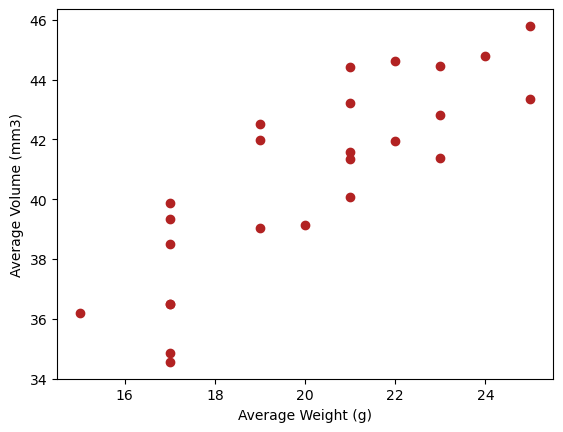

In [81]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'], color = "firebrick")
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Volume (mm3)')
plt.show()

## Correlation and Regression

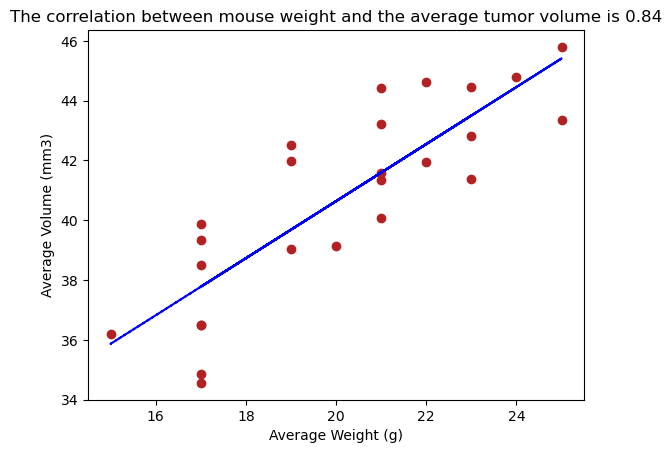

In [82]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import numpy as np # couldnt figure out how to do this without numpy

capomulin_table = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

# Create the scatter plot
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'], color="firebrick")
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Volume (mm3)')

# correlation coefficient
correlation = np.corrcoef(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])[0, 1]

# Add a line of best fit (regression line)
coefficients = np.polyfit(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'], 1)
poly = np.poly1d(coefficients)
plt.plot(capomulin_average['Weight (g)'], poly(capomulin_average['Weight (g)']), color='blue', linestyle='--')

# Display 
plt.title(f'The correlation between mouse weight and the average tumor volume is {correlation:.2f}')

plt.show()